In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)

In [3]:
# Максимальное количество слов (по частоте использования)
max_words = 10000

In [4]:
# Максимальная длина рецензии в словах
maxlen = 200

In [5]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [6]:
# Заполняем или обрезаем рецензии
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [7]:
# Создаем сеть
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(32, recurrent_dropout = 0))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Копмилируем модель
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [9]:
# Обучаем модель
history = model.fit(X_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 11s 39ms/step - loss: 0.5422 - accuracy: 0.7176 - val_loss: 0.3611 - val_accuracy: 0.8528
Epoch 2/15
176/176 [==============================] - 6s 35ms/step - loss: 0.2804 - accuracy: 0.8899 - val_loss: 0.3099 - val_accuracy: 0.8760
Epoch 3/15
176/176 [==============================] - 6s 35ms/step - loss: 0.2057 - accuracy: 0.9240 - val_loss: 0.2881 - val_accuracy: 0.8836
Epoch 4/15
176/176 [==============================] - 6s 36ms/step - loss: 0.1644 - accuracy: 0.9424 - val_loss: 0.3100 - val_accuracy: 0.8764
Epoch 5/15
176/176 [==============================] - 6s 35ms/step - loss: 0.1352 - accuracy: 0.9547 - val_loss: 0.3324 - val_accuracy: 0.8736
Epoch 6/15
176/176 [==============================] - 6s 35ms/step - loss: 0.1163 - accuracy: 0.9624 - val_loss: 0.3812 - val_accuracy: 0.8728
Epoch 7/15
176/176 [==============================] - 6s 35ms/step - loss: 0.0974 - accuracy: 0.9696 - val_loss: 0.4349 - val_accuracy: 0.866

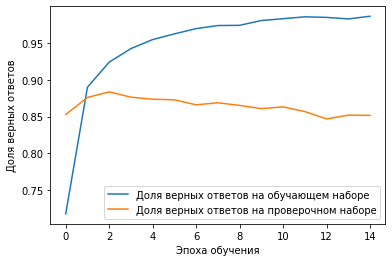

In [10]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [11]:
#Проверяем работу сети на тестовом наборе данных
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 11s 14ms/step - loss: 0.5842 - accuracy: 0.8379
